# Electric Vehicle Population

This dataset shows the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered through Washington State Department of Licensing (DOL).

## Import libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5UX43EU08R,King,Seattle,WA,98125.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,46.0,264762606,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
2,5UX43EU06R,King,Seattle,WA,98102.0,2024,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,39,0,43.0,275506031,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EA1J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,117023581,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,1G1RA6E43C,Thurston,Olympia,WA,98501.0,2012,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,35,0,35.0,158415498,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220220,KNDC4DLC5N,Thurston,Olympia,WA,98501.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,22.0,202095862,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
220221,5YJ3E1EA5J,Snohomish,Bothell,WA,98012.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,288277657,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220222,5YJ3E1EB0K,Snohomish,Bothell,WA,98012.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,44.0,478018719,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220223,2C4RC1L72N,King,Redmond,WA,98053.0,2022,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,45.0,216607737,POINT (-122.03287 47.68555),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [4]:
df['County'].unique()

array(['King', 'Thurston', 'Yakima', 'Kitsap', 'Snohomish', 'Island',
       'Chelan', 'Whitman', 'Spokane', 'Skagit', 'Grant', 'Kittitas',
       'Stevens', 'Walla Walla', 'Clark', 'Cowlitz', 'Jefferson',
       'Clallam', 'Klickitat', 'Pierce', 'Douglas', 'Lewis', 'Okanogan',
       'Pend Oreille', 'Whatcom', 'Mason', 'Benton', 'Grays Harbor',
       'Franklin', 'San Juan', 'Monterey', 'Columbia', 'Pacific',
       'Lincoln', 'Skamania', 'Sarasota', 'Wahkiakum', 'Asotin', 'Adams',
       'Wasco', 'Orange', 'Lee', 'San Diego', 'District of Columbia',
       'Wake', 'Richland', 'Lake', 'Kern', 'Churchill', 'Oldham', 'Polk',
       'Anne Arundel', 'Riverside', 'San Francisco', 'Ferry', 'DeKalb',
       'New York', 'Kings', 'Leavenworth', 'Los Angeles', 'Santa Clara',
       'Montgomery', 'Garfield', 'Madison', 'Allegheny', 'Fairfax',
       'Macomb', 'San Mateo', 'Sacramento', 'Ada', 'James City',
       'Stafford', 'Pulaski', 'Collin', 'Virginia Beach', 'Newport',
       'Harnett', 'Co

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220225 entries, 0 to 220224
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         220225 non-null  object 
 1   County                                             220222 non-null  object 
 2   City                                               220222 non-null  object 
 3   State                                              220225 non-null  object 
 4   Postal Code                                        220222 non-null  float64
 5   Model Year                                         220225 non-null  int64  
 6   Make                                               220225 non-null  object 
 7   Model                                              220225 non-null  object 
 8   Electric Vehicle Type                              220225 non-null  object

In [6]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,220222.000000,220225.000000,220225.000000,220225.000000,219762.000000,2.202250e+05,2.202220e+05
mean,98176.179355,2021.194242,48.724423,852.456874,28.907909,2.315541e+08,5.298061e+10
std,2534.666722,2.981490,85.874160,7469.168138,14.911386,6.983360e+07,1.524348e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,1.980609e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,32.000000,2.448443e+08,5.303303e+10
75%,98374.000000,2023.000000,42.000000,0.000000,42.000000,2.659792e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [7]:
df['Make'].unique()

array(['TESLA', 'BMW', 'CHEVROLET', 'VOLKSWAGEN', 'KIA', 'RIVIAN',
       'TOYOTA', 'NISSAN', 'JEEP', 'FIAT', 'FORD', 'VOLVO', 'CHRYSLER',
       'AUDI', 'LEXUS', 'ALFA ROMEO', 'JAGUAR', 'PORSCHE', 'POLESTAR',
       'MINI', 'MAZDA', 'DODGE', 'HONDA', 'HYUNDAI', 'MERCEDES-BENZ',
       'CADILLAC', 'SUBARU', 'LINCOLN', 'MITSUBISHI', 'SMART',
       'LAND ROVER', 'LUCID', 'GENESIS', 'GMC', 'FISKER', 'ACURA',
       'TH!NK', 'VINFAST', 'BRIGHTDROP', 'MULLEN AUTOMOTIVE INC.',
       'AZURE DYNAMICS', 'ROLLS-ROYCE', 'BENTLEY', 'WHEEGO ELECTRIC CARS',
       'RAM', 'LAMBORGHINI'], dtype=object)

In [8]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 463
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [10]:
df['Model'].unique()

array(['MODEL 3', 'X5', 'VOLT', 'ID.4', 'EV9', 'NIRO', 'R1T', 'MODEL X',
       'PRIUS PRIME', 'LEAF', 'I3', 'WRANGLER', 'MODEL Y', 'BZ4X',
       'MODEL S', '500', 'C-MAX', 'X3', 'XC90', 'PACIFICA', 'E-TRON',
       'NX', '330E', 'SORENTO', 'XC60', 'CYBERTRUCK', 'TONALE',
       'GRAND CHEROKEE', 'RAV4 PRIME', 'I-PACE', 'A3', 'FUSION',
       'BOLT EV', 'EV6', 'CAYENNE', 'PS2', 'HARDTOP', 'CX-90', 'HORNET',
       'COUNTRYMAN', 'I4', 'CLARITY', 'CX-70', 'I8', 'Q5', 'RX', '530E',
       'Q5 E', 'SOUL', 'IONIQ 6', 'TUCSON', 'XM', 'SPARK', 'V60',
       'PRIUS PLUG-IN', 'EQE-CLASS SUV', 'LYRIQ', 'EQS-CLASS SEDAN',
       'IONIQ 5', 'F-150', 'XC40', 'ROADSTER', 'TAYCAN', 'MUSTANG MACH-E',
       'KONA ELECTRIC', 'ARIYA', 'EQB-CLASS', 'BOLT EUV', 'SOLTERRA',
       'IONIQ', 'R1S', 'E-TRON GT', 'EQUINOX EV', 'SANTA FE', 'BLAZER EV',
       'EQS-CLASS SUV', 'IX', 'GLE-CLASS', 'B-CLASS', 'E-GOLF', 'RZ',
       'FOCUS', 'Q8', 'AVIATOR', 'PROLOGUE', 'TRANSIT', 'GLC-CLASS',
       'EQE-CLASS SED

In [11]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

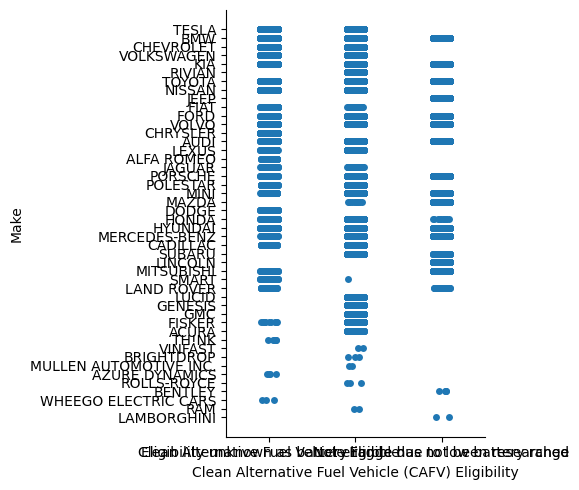

In [12]:
sns.catplot(df,x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',y='Make')

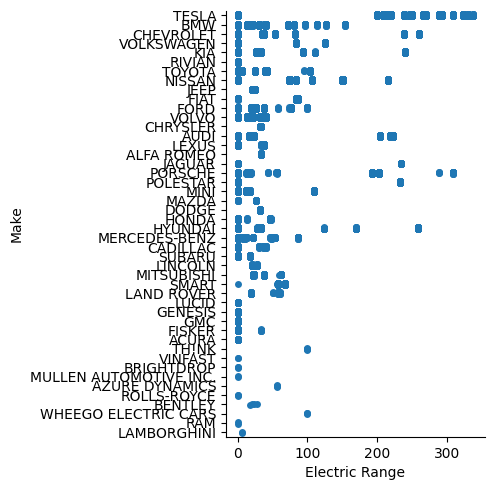

In [13]:
sns.catplot(df,x='Electric Range',y='Make')

<Axes: xlabel='Model Year', ylabel='count'>

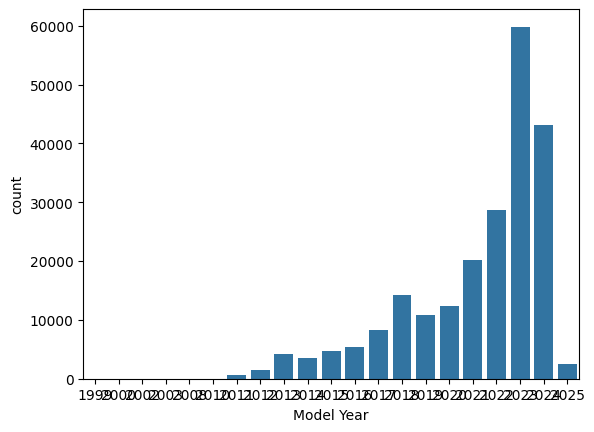

In [14]:
sns.countplot(df,x='Model Year')

<Axes: xlabel='count', ylabel='Make'>

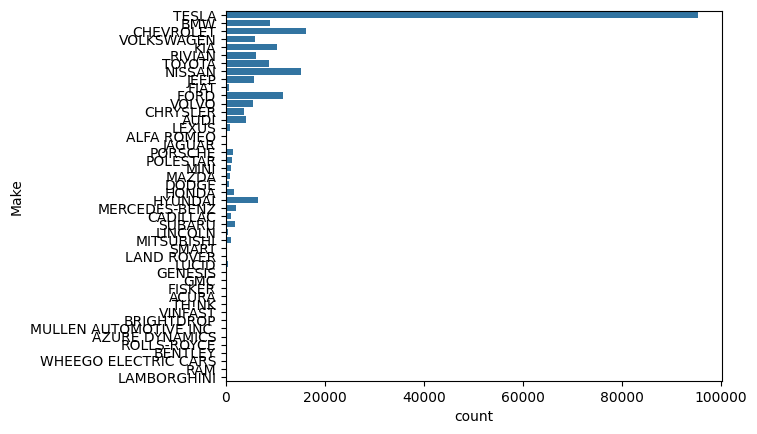

In [16]:
sns.countplot(df,y='Make')

<Axes: xlabel='count', ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

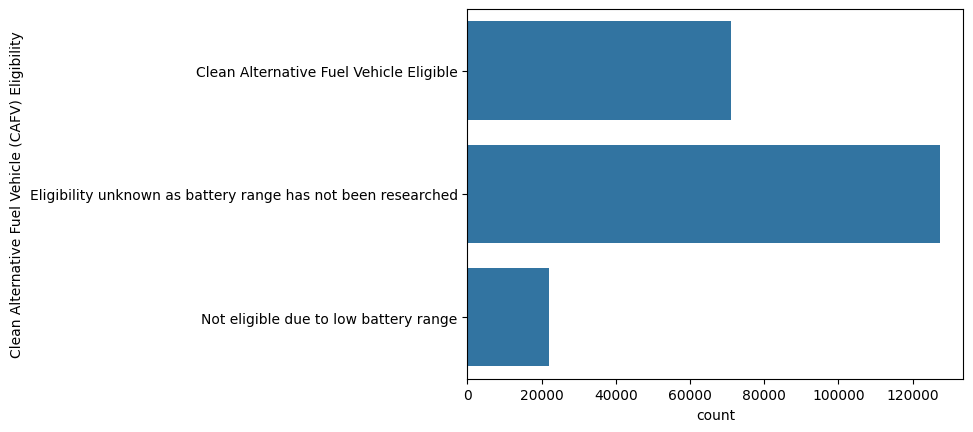

In [17]:
sns.countplot(df,y='Clean Alternative Fuel Vehicle (CAFV) Eligibility')

<Axes: xlabel='Electric Vehicle Type', ylabel='count'>

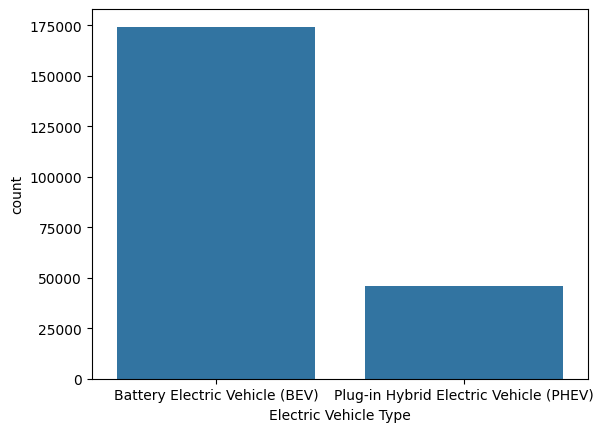

In [18]:
sns.countplot(df,x='Electric Vehicle Type')

In [32]:
l_e = LabelEncoder()

In [33]:
df['Make'] = l_e.fit_transform(df['Make'])

In [35]:
df['Model'] = l_e.fit_transform(df['Model'])

In [37]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = l_e.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

In [38]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA5L,King,Seattle,WA,98133.0,2020,39,90,Battery Electric Vehicle (BEV),0,266,0,46.0,249903111,POINT (-122.35029 47.71871),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5UX43EU08R,King,Seattle,WA,98125.0,2024,5,152,Plug-in Hybrid Electric Vehicle (PHEV),0,39,0,46.0,264762606,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
2,5UX43EU06R,King,Seattle,WA,98102.0,2024,5,152,Plug-in Hybrid Electric Vehicle (PHEV),0,39,0,43.0,275506031,POINT (-122.32427 47.63433),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJ3E1EA1J,King,Kirkland,WA,98034.0,2018,39,90,Battery Electric Vehicle (BEV),0,215,0,1.0,117023581,POINT (-122.22901 47.72201),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,1G1RA6E43C,Thurston,Olympia,WA,98501.0,2012,8,148,Plug-in Hybrid Electric Vehicle (PHEV),0,35,0,35.0,158415498,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220220,KNDC4DLC5N,Thurston,Olympia,WA,98501.0,2022,20,51,Battery Electric Vehicle (BEV),1,0,0,22.0,202095862,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10
220221,5YJ3E1EA5J,Snohomish,Bothell,WA,98012.0,2018,39,90,Battery Electric Vehicle (BEV),0,215,0,1.0,288277657,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220222,5YJ3E1EB0K,Snohomish,Bothell,WA,98012.0,2019,39,90,Battery Electric Vehicle (BEV),0,220,0,44.0,478018719,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10
220223,2C4RC1L72N,King,Redmond,WA,98053.0,2022,9,102,Plug-in Hybrid Electric Vehicle (PHEV),0,32,0,45.0,216607737,POINT (-122.03287 47.68555),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [46]:
X = df[['Make','Model','Clean Alternative Fuel Vehicle (CAFV) Eligibility']]
y = df['Electric Range']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
import xgboost as xgb

In [50]:
xgb_model = xgb.XGBRegressor()

In [51]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
xgb_pred = xgb_model.predict(X_test)

In [59]:
xgb_r2 = r2_score(y_test, xgb_pred)
print(f"XGBoost R-squared: {xgb_r2}")

XGBoost R-squared: 0.9626159071922302


evaluation metrics
predictions 
streamlit app

In [60]:
xgb_pred

array([ 1.07179556e-04,  1.07179556e-04,  1.07179556e-04, ...,
       -2.23306488e-04,  1.07179556e-04,  2.04922295e+01], dtype=float32)